<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the boston housing data (provided)

In [1]:
# Download the data and save to a file called "housing.data."
import urllib.request
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# this saves a file called 'housing.data' locally'
urllib.request.urlretrieve(data_url, './datasets/housing.data')

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [9]:
# 1. CRIM      - per capita crime rate by town
# 2. ZN        - proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. INDUS     - proportion of non-retail business acres per town
# 4. CHAS      - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5. NOX       - nitric oxides concentration (parts per 10 million)
# 6. RM        - average number of rooms per dwelling
# 7. AGE       - proportion of owner-occupied units built prior to 1940
# 8. DIS       - weighted distances to five Boston employment centres
# 9. RAD       - index of accessibility to radial highways
# 10. TAX      - full-value property-tax rate per 10,000 dollars. 
# 11. PTRATIO  - pupil-teacher ratio by town
# 12. B        - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# 13. LSTAT    - Percent lower status of the population
# 14. MEDV     - Median value of owner-occupied homes in $1000's

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

### 2. Load the `housing.data` file with python

Using any method of your choice.

> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [3]:
# Reading in the local file 'housing.data'
data = []
with open('./datasets/housing.data', 'r') as f:
    rows = f.readlines()
    for row in rows:
        row = [float(x) for x in row.split()]
        data.append(row)
f.close()

### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [54]:
# A: All numeric float values (convert to float) which vary from 0 to over 100
# 'LSTAT' column is percentages

data[0]

[0.00632,
 18.0,
 2.31,
 0.0,
 0.538,
 6.575,
 65.2,
 4.09,
 1.0,
 296.0,
 15.3,
 396.9,
 4.98,
 24.0]

In [5]:
# put the data into a dictionary with keys identified by column names:
housing_dict = {key_name:[row[index] for row in data] for index, key_name in enumerate(names)}

In [7]:
import numpy as np

np.unique(housing_dict['RAD'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 24.])

In [8]:
print(housing_dict.keys())

dict_keys(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])


In [9]:
# convert from string to float
for name, col in housing_dict.items():
    col = [float(x) for x in col]
    housing_dict[name] = col

In [10]:
# Checking for any abnormal values in column 'CHAS' - none reported
max_one = ['CHAS']

for feature in max_one:
    for observation in housing_dict[feature]:
        if observation > 1 or observation < 0:
            print('Abnormal Value found in ', feature, 'with value of', observation)

In [11]:
# Checking for any abnormal values in columns 'ZN', 'INDUS', 'RM', 'LSTAT', 'PTRATIO', 'CRIM'
max_hund = ['ZN','INDUS','RM','LSTAT','PTRATIO', 'CRIM']

for feature in max_hund:
    for observation in housing_dict[feature]:
        if observation > 100 or observation < 0:
            print('Abnormal Value found in ', feature, 'with value of', observation)

In [134]:
# Checking for any missing data
print('Number of Expected Features: ' + str(len(names)))

print('Number of Actual Features: ' + str(len(housing_dict.keys())))

for key, data in housing_dict.items():
    print("%d rows in %s" % (len(data), key))

Number of Expected Features: 14
Number of Actual Features: 14
506 rows in CRIM
506 rows in ZN
506 rows in INDUS
506 rows in CHAS
506 rows in NOX
506 rows in RM
506 rows in AGE
506 rows in DIS
506 rows in RAD
506 rows in TAX
506 rows in PTRATIO
506 rows in B
506 rows in LSTAT
506 rows in MEDV


### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

In [12]:
# A: 
# 'CHAS' is binary classification, 0 or 1
# 'RAD' is classification index (9 unique values)

np.median(housing_dict['CHAS'])

0.0

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*



In [13]:
# A: Use covariance function below as metric, to see if variables have linear association

def covariance_matrix(data1, data2):
    covariance = np.cov(data1, data2)
    return covariance

In [19]:
covariance_matrix(housing_dict['NOX'], housing_dict['DIS'])

array([[ 0.01342764, -0.18769584],
       [-0.18769584,  4.43401514]])

Most similar negative linear relationship is B and TAX (-6797)

Most similar positive linear relationship is AGE and TAX (2402)

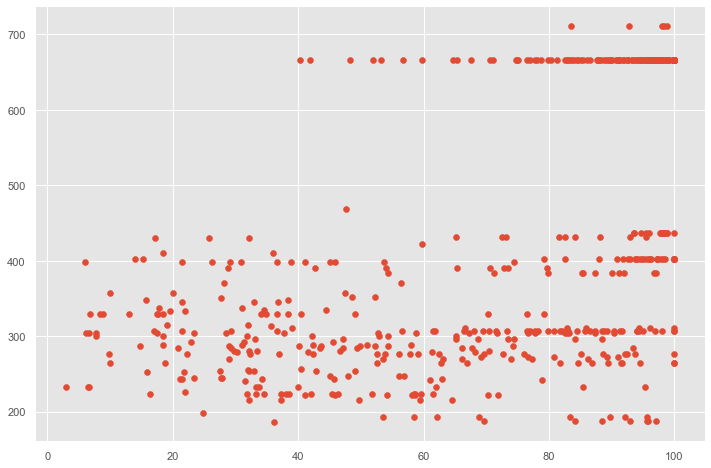

In [62]:
# visual scatter plot to see relationship
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

plt.scatter(housing_dict['AGE'], housing_dict['TAX'])
plt.show;

Another method suggested by teacher is to use Pearson's Correlation Coefficient, which shows that 'NOX' and 'DIS' have strongest linear relationship:


In [23]:
relationships = []

# Choosing to use the pearson correlation coefficient, "np.corrcoef":
for name in housing_dict.keys():
    # do not consider RAD or CHAS:
    if name not in ['RAD','CHAS']:
        for other in housing_dict.keys():
            if (name != other) and (other not in ['RAD','CHAS']):
                relationships.append([name, other, np.corrcoef(housing_dict[name], housing_dict[other])[0,1]])

In [57]:
#relationships

In [25]:
# In order to determine which are the strongest relationships, convert to absolute and sort list, but output original values
# We index 'x[2]' because we are sorting based on the third element, the corrcoef value
sort_rel = sorted(relationships, key=lambda x: np.abs(x[2]), reverse=True)

In [27]:
# Loop through the sorted list to nicely output top 5 results, showing 'NOX' and 'DIS' to have strongest linear relationship
for i in range(5):
    print(sort_rel[i])

['NOX', 'DIS', -0.7692301132258278]
['DIS', 'NOX', -0.7692301132258278]
['INDUS', 'NOX', 0.7636514469209147]
['NOX', 'INDUS', 0.7636514469209147]
['AGE', 'DIS', -0.7478805408686319]


In [60]:
#sort_rel[0:5]

In [49]:
# Calculating Kendalls Rank Correlation coefficient & p-value (must use ordinal data)
from scipy.stats import kendalltau

coef, p_value = kendalltau(housing_dict['RAD'], housing_dict['CHAS'])

In [50]:
print(coef)

0.021739356528836715


In [51]:
# Calculating Spearman's Rank Correlation coefficient & p-value (must use ordinal data)
from scipy.stats import spearmanr

sp_coef, sp_p = spearmanr(housing_dict['CHAS'], housing_dict['NOX'])

In [52]:
print(sp_coef)

0.06842628320937427


### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 'RM' and 'LSTAT'
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

In [30]:
# A: Visually
import seaborn as sns
from scipy.stats import norm

def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

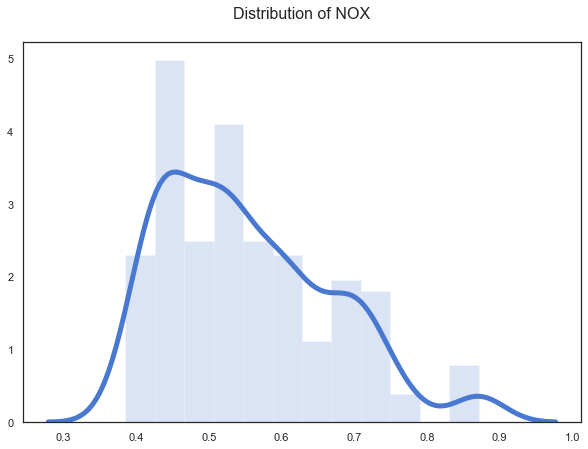

In [31]:
distribution_plotter('NOX', housing_dict)

The following method was suggested by teacher for assessing distribution:


In [55]:
# Symmetric: the metric with the smallest absolute(mean - median)
# Left: the metric with the smallest mean - median
# Right: the metric with the largest mean - median

symmetric = sorted([[key_name, np.abs(np.mean(values) - np.median(values))] for key_name,values in housing_dict.items()], key=lambda x: x[1])
print('Symmetric:', symmetric[0])

left = sorted([[k, np.mean(v) - np.median(v)] for k,v in housing_dict.items()], key=lambda x: x[1])
print('Left:', left[0])

right = sorted([[k, np.mean(v) - np.median(v)] for k,v in housing_dict.items()], key=lambda x: x[1], reverse=True)
print('Right:', right[0])

Symmetric: ['NOX', 0.01669505928853754]
Left: ['B', -34.765968379446576]
Right: ['TAX', 78.23715415019763]


### 8. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [33]:
# A:
from scipy.stats import norm

def norm_distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, fit=norm, hist_kws={'alpha':0.2}, kde=False)
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

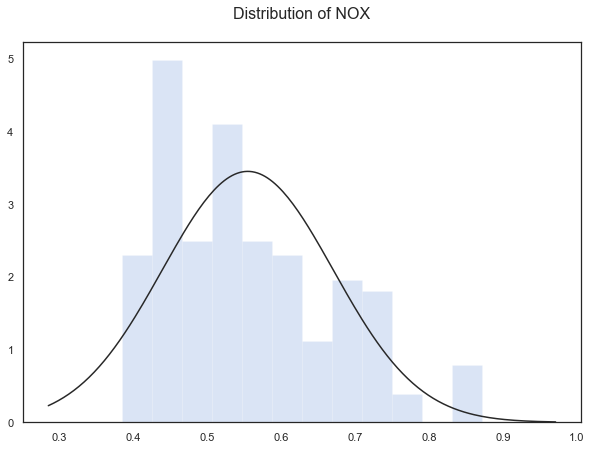

In [34]:
norm_distribution_plotter('NOX', housing_dict)

Teacher continues her suggestions by scaling the previous mean and median calculations with *np.ptp* function - this function returns the range value (max-min value).


In [63]:
def scaled_diff(v):
    return (np.mean(v) - np.median(v))/np.ptp(v)

symmetric = sorted([[k, np.abs(scaled_diff(v))] for k,v in housing_dict.items()], key=lambda x: x[1])
print('Symmetric:', symmetric[0])

left = sorted([[k, scaled_diff(v)] for k,v in housing_dict.items()], key=lambda x: x[1])
print('Left:', left[0])

right = sorted([[k, scaled_diff(v)] for k,v in housing_dict.items()], key=lambda x: x[1], reverse=True)
print('Right:', right[0])

Symmetric: ['RM', 0.01458792629848224]
Left: ['AGE', -0.09191656863263897]
Right: ['RAD', 0.19780030933150025]


### 9. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

Sketch of Answer:

You should report at least one measure of center, one measure of spread, and a description (metric-based or plot-based) of the shape of the distribution of each variable.

Defending which of these choices is better (i.e. median is a better measure of center than mean because...)

Including multiple measures of center and/or spread, and interpreting what these reveal about the distribution of a variable is especially good.

Including a plot that goes along with these metrics and this description would turn this answer from a "good" one into a "great" one. A report to a supervisor should ideally include these points.


In [9]:
# A:

### 10. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

In [10]:
# A: Solution: For all exercises, we relied only on descriptive statistics.

### 11. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**11.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [64]:
# A:

age = housing_dict['AGE']

import random

age_sample = random.sample(age, 50)

**11.B Identify the type of sampling we just used.**

In [12]:
# A: Simple random sampling

### 12. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


In [13]:
# A: Stratified random sampling is a method
# Used when we want to protect ourselves from a potentially skewed" random sample, like what about 'CHAS'/'RAD' data values?
# The variable 'CHAS' takes on two values: 1 and 0
# Rather than selecting 50 observations at random, we could look at the proportion of 1s and 0s for the 'CHAS' variable:
# Select 50 * (proportion of 1s) observations where 'CHAS'=1, then select 50 * (proportion of 0s) obervations where 'CHAS'=0
# Now you can perform testing on sample where the focus is behaviour of other variables based on 'CHAS' categorisation